# Selection of Dataset and Algorithm:

Each student will choose a dataset suitable for object detection tasks. The 
dataset can be from publicly available sources (e.g., COCO, PASCAL VOC) or 
one they create.


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sDa7pej7MbiBdSRowjPm")
project = rf.workspace("joseph-nelson").project("chess-full")
version = project.version(23)
dataset = version.download("coco")

dataset successfully installed


# Data Preparation: 

Preprocess the dataset by resizing images, normalizing pixel values, and, if necessary, labeling bounding boxes for objects.

In [6]:
import os
import cv2
import numpy as np
import json

# Define the input directory and desired size for resizing
input_dir = 'dataset'
desired_size = (640, 640)

def preprocess_image(image_path, size):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Warning: Could not read image {image_path}. It may be corrupted or in an unsupported format.")
        return None

    img_resized = cv2.resize(img, size)

    img_normalized = img_resized / 255.0
    img_to_save = (img_normalized * 255).astype(np.uint8)

    # Save the resized image
    cv2.imwrite(image_path, img_to_save)

    return img.shape[:2], img_resized.shape[:2]  # Return original and resized dimensions

def preprocess_dataset(base_dir):
    for split in ['train', 'valid', 'test']:
        split_dir = os.path.join(base_dir, split)
        print(f"Processing {split} dataset...")

        # Preprocess images in each split
        for filename in os.listdir(split_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                input_path = os.path.join(split_dir, filename)

                # Preprocess image and get original and resized dimensions
                original_shape, resized_shape = preprocess_image(input_path, desired_size)

                # If annotations exist, adjust them (assumed to be in a JSON format)
                annotation_file = os.path.join(split_dir, f"{os.path.splitext(filename)[0]}.json")
                if os.path.exists(annotation_file):
                    with open(annotation_file, 'r') as f:
                        annotations = json.load(f)

                    # Adjust bounding boxes based on resizing
                    for anno in annotations['annotations']:
                        bbox = anno['bbox']  # Assuming bbox is in [x, y, width, height]
                        x, y, width, height = bbox

                        # Calculate scale factors
                        scale_x = resized_shape[1] / original_shape[1]
                        scale_y = resized_shape[0] / original_shape[0]

                        # Update the bounding box
                        anno['bbox'] = [int(x * scale_x), int(y * scale_y), int(width * scale_x), int(height * scale_y)]

                    # Save adjusted annotations back to file
                    with open(annotation_file, 'w') as f:
                        json.dump(annotations, f)

        print(f"Preprocessing completed for {split} dataset.")

# Run preprocessing
preprocess_dataset(input_dir)


Processing train dataset...
Preprocessing completed for train dataset.
Processing valid dataset...
Preprocessing completed for valid dataset.
Processing test dataset...
Preprocessing completed for test dataset.


# Initial Setup

In [19]:
from ultralytics import YOLO

from IPython.display import display, Image

In [1]:
import os
HOME = os.getcwd()
print(f"HOME DIR : {HOME}")

HOME DIR : d:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code


In [12]:
from IPython import display
display.clear_output()

import ultralytics # type: ignore
ultralytics.checks()

Ultralytics 8.3.23  Python-3.10.15 torch-2.5.0+cpu CPU (Intel Core(TM) i7-8700 3.20GHz)
Setup complete  (12 CPUs, 31.9 GB RAM, 619.6/931.5 GB disk)


# Training the Model: 
Use the training data to train the object detection model. For deep learning methods, fine-tune hyperparameters (e.g., learning rate, batch size, epochs) to optimize model performance.

In [18]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={'dataset'}/data.yaml epochs=25 imgsz=800 plots=True

d:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code


d:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code


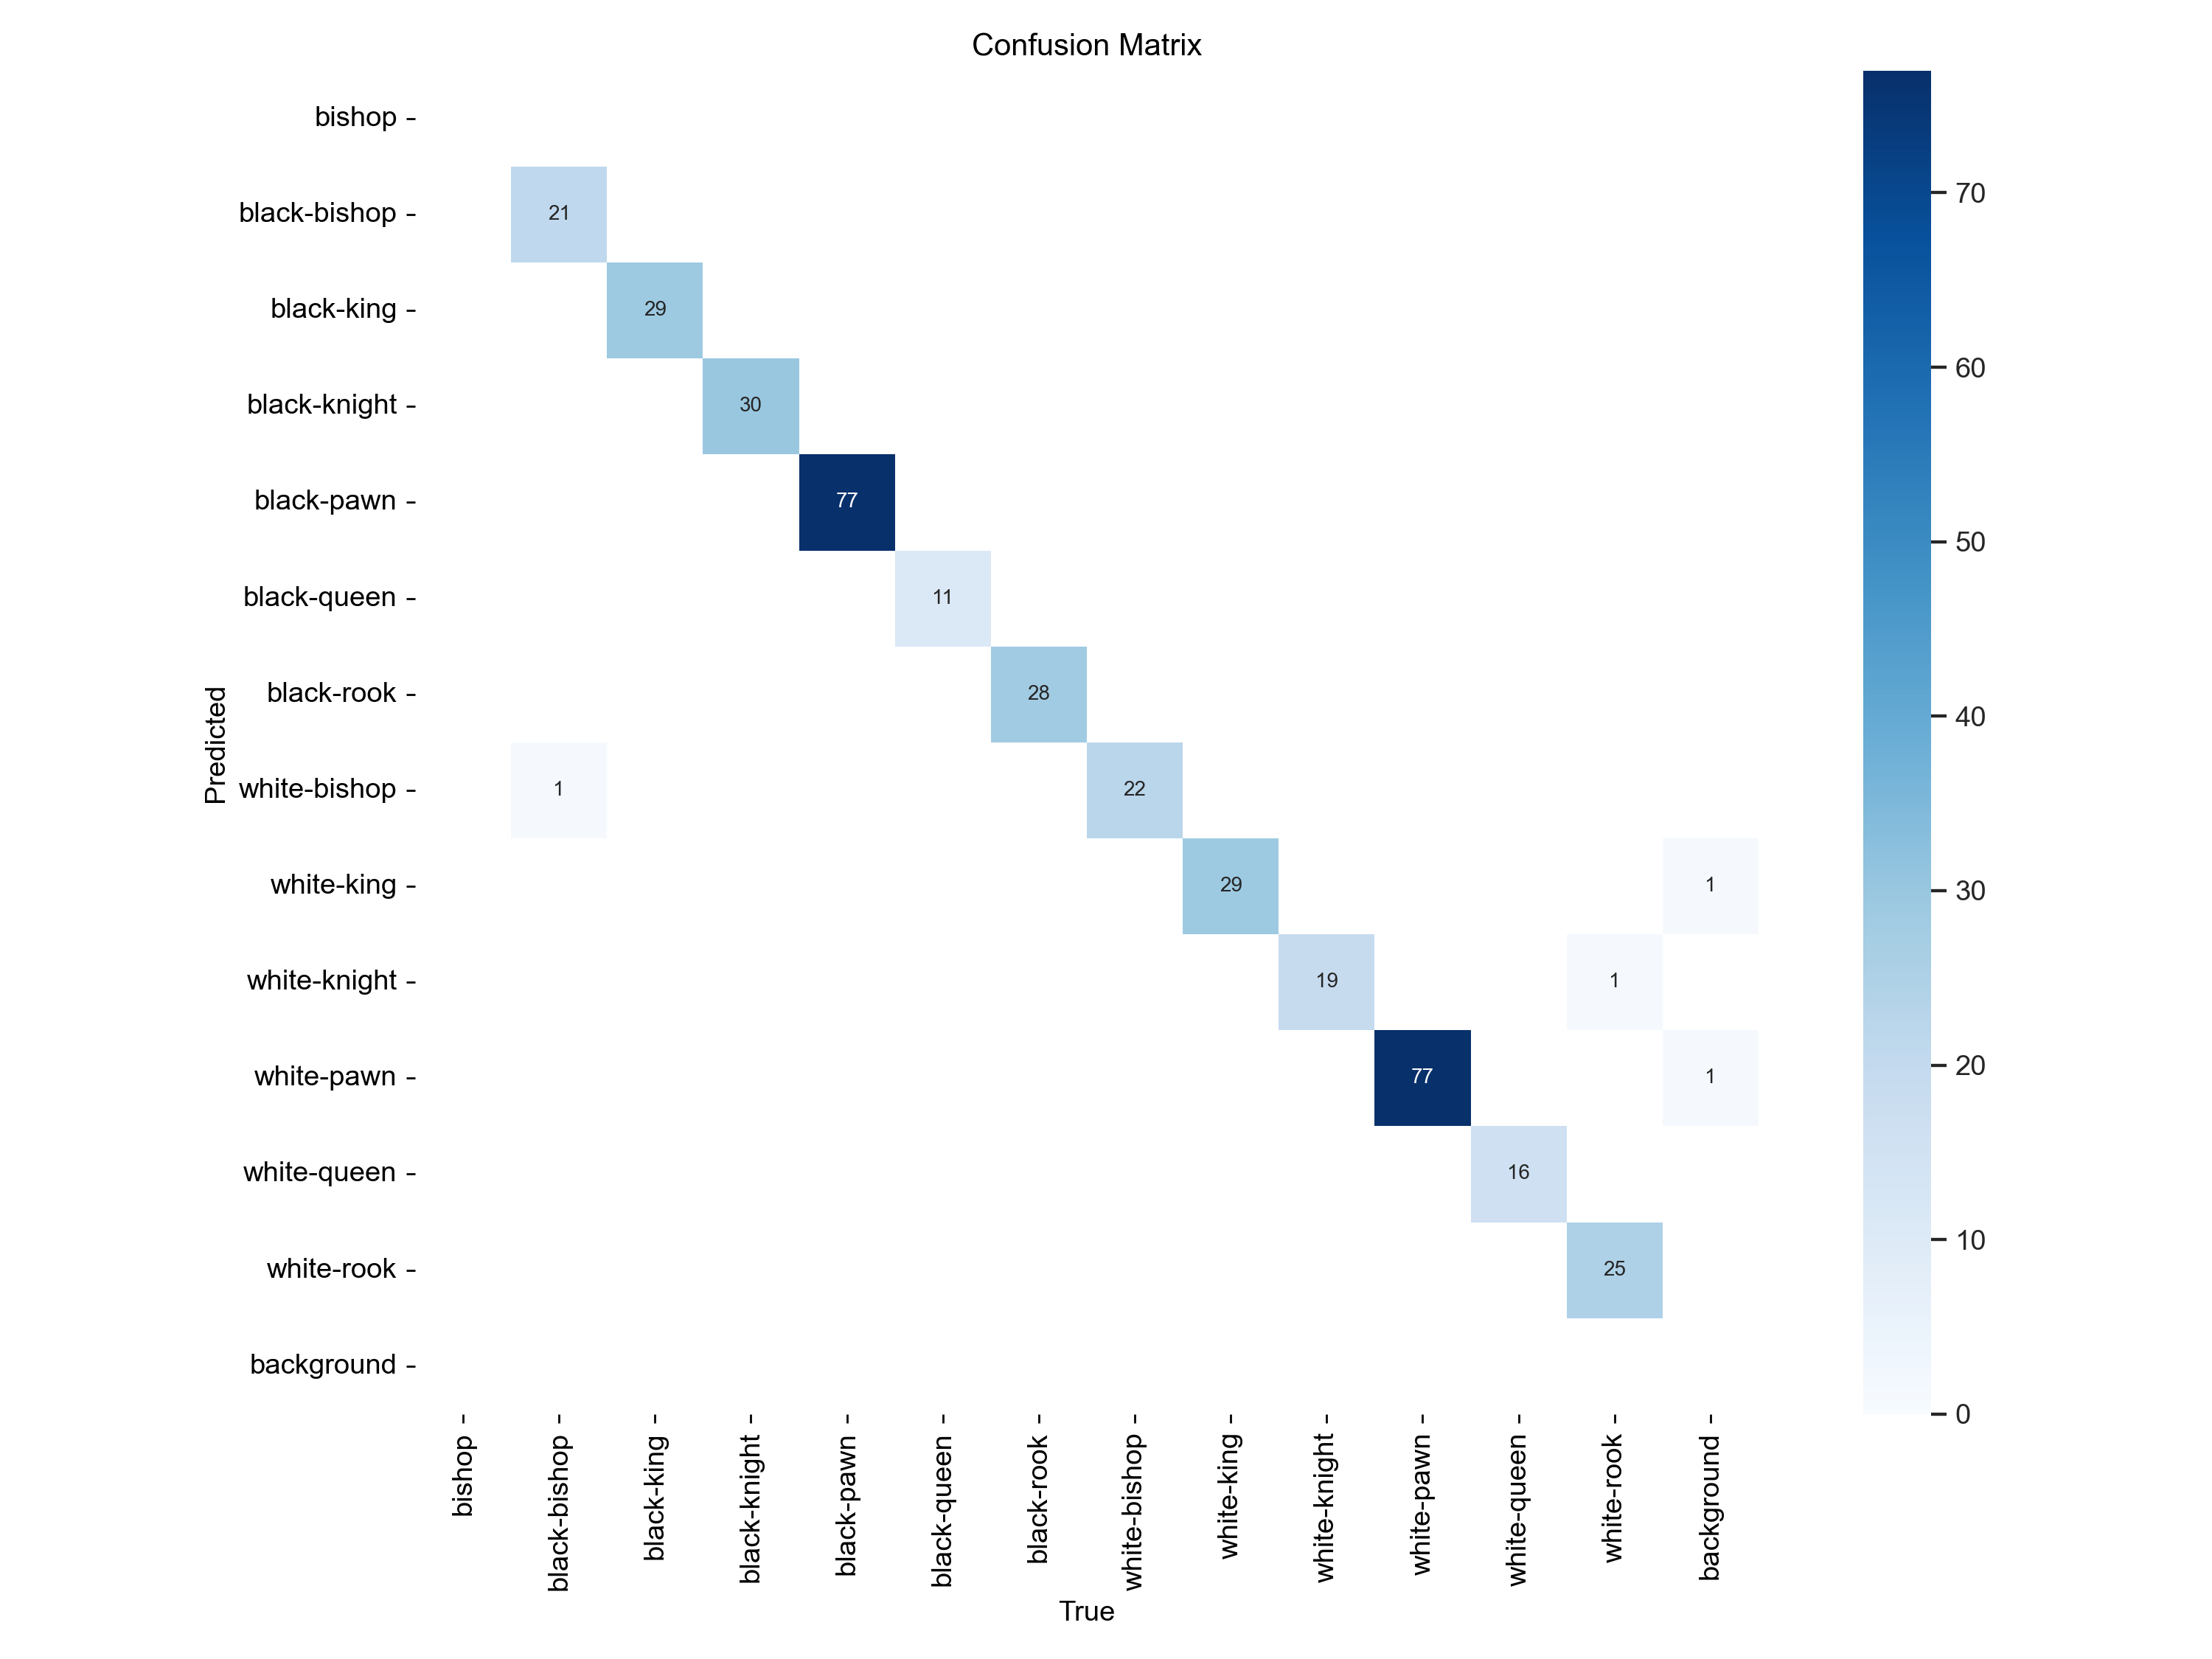

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

d:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code


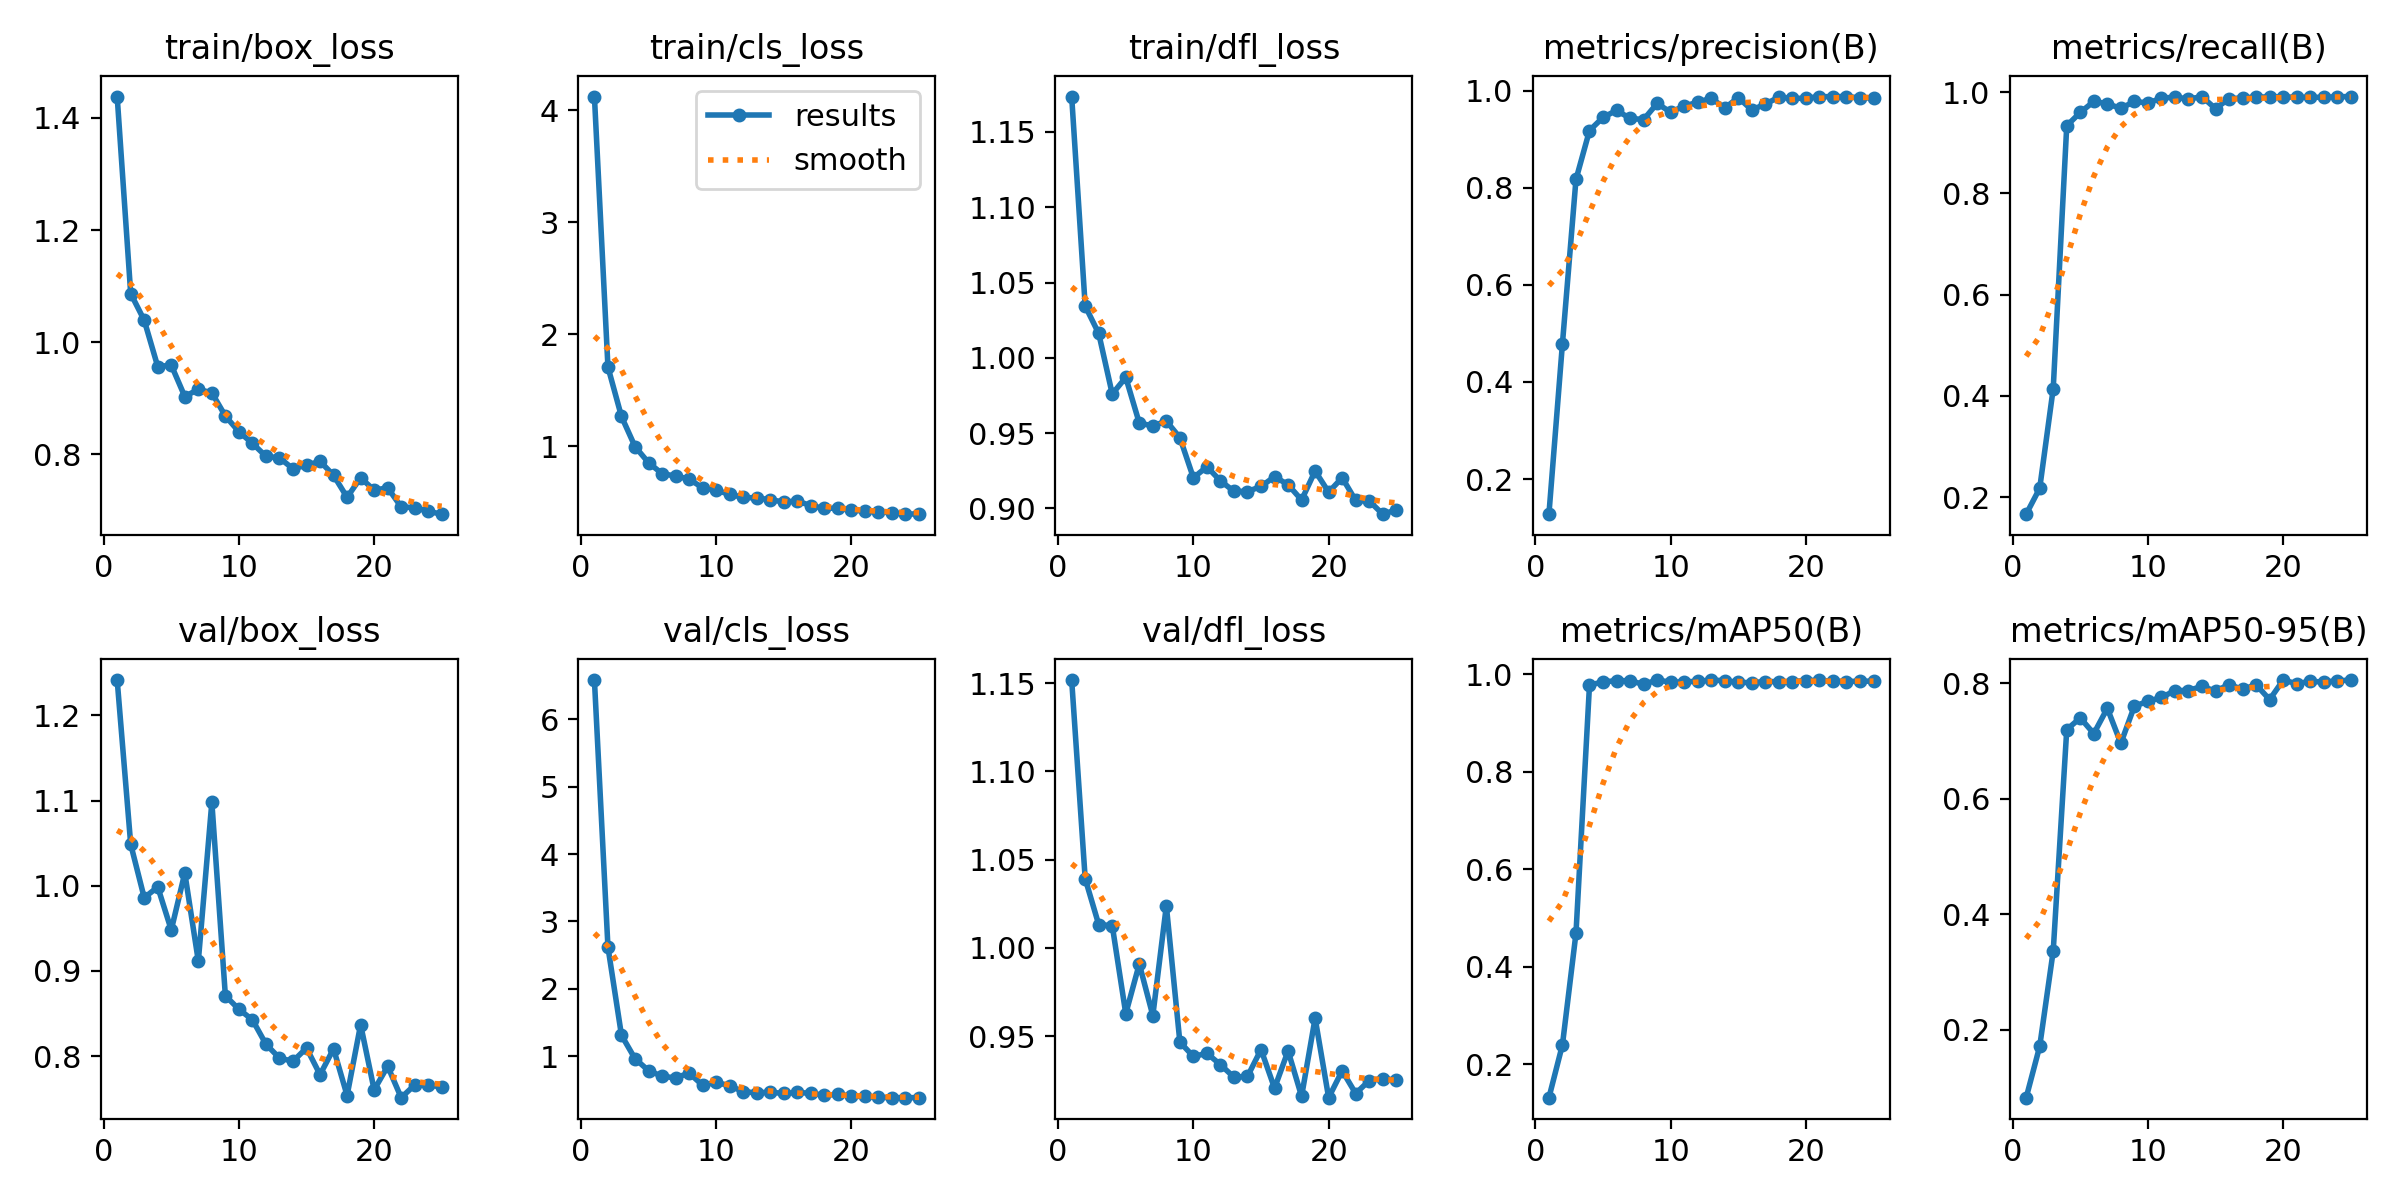

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [5]:
%cd {HOME}

model_path = r"runs/detect/train/weights/best.pt"
data_path = r"dataset/data.yaml"

!yolo task=detect mode=val model={model_path} data={data_path}


d:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code
Ultralytics 8.3.23 🚀 Python-3.10.15 torch-2.5.0+cpu CPU (Intel Core(TM) i7-8700 3.20GHz)
Model summary (fused): 168 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs
                   all         58        386      0.985      0.991      0.986      0.806
          black-bishop         13         22      0.999      0.955      0.958      0.694
            black-king         29         29          1      0.981      0.995      0.858
          black-knight         26         30      0.996          1      0.995      0.841
            black-pawn         25         77      0.998          1      0.995      0.803
           black-queen         11         11      0.976          1      0.995      0.846
            black-rook         24         28      0.993          1      0.995      0.788
          white-bishop         17         22      0.951          1      0.962      0.718


val: Scanning D:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code\dataset\valid\labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]
val: Scanning D:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code\dataset\valid\labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:04<00:12,  4.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:07<00:07,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:10<00:0

# Testing: 
Evaluate the model on a test set to assess its detection capabilities. Ensure to capture edge cases where the model may struggle.

In [26]:
%cd {HOME}
!yolo task=detect mode=predict model="D:/03PersonalFiles/subjects/computer vision/Machine_Problem_1/CSST106-4A/CSST106-Perception-and-Computer-Vision/code/runs/detect/train/weights/best.pt" conf=0.25 source="dataset/test/images" save=True


d:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code
Ultralytics 8.3.23 🚀 Python-3.10.15 torch-2.5.0+cpu CPU (Intel Core(TM) i7-8700 3.20GHz)
Model summary (fused): 168 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs

image 1/29 d:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code\dataset\test\images\0b47311f426ff926578c9d738d683e76_jpg.rf.0b55f43ac16aa65c889558d8ea757072.jpg: 544x800 1 white-bishop, 155.6ms
image 2/29 d:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code\dataset\test\images\1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.9ce88078ea356949f4ab7ad9cfdfc62d.jpg: 544x800 1 white-rook, 133.6ms
image 3/29 d:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code\dataset\test\images\2f6fb003bb89cd401322a535acb42f65_jpg.rf.91ad9df0

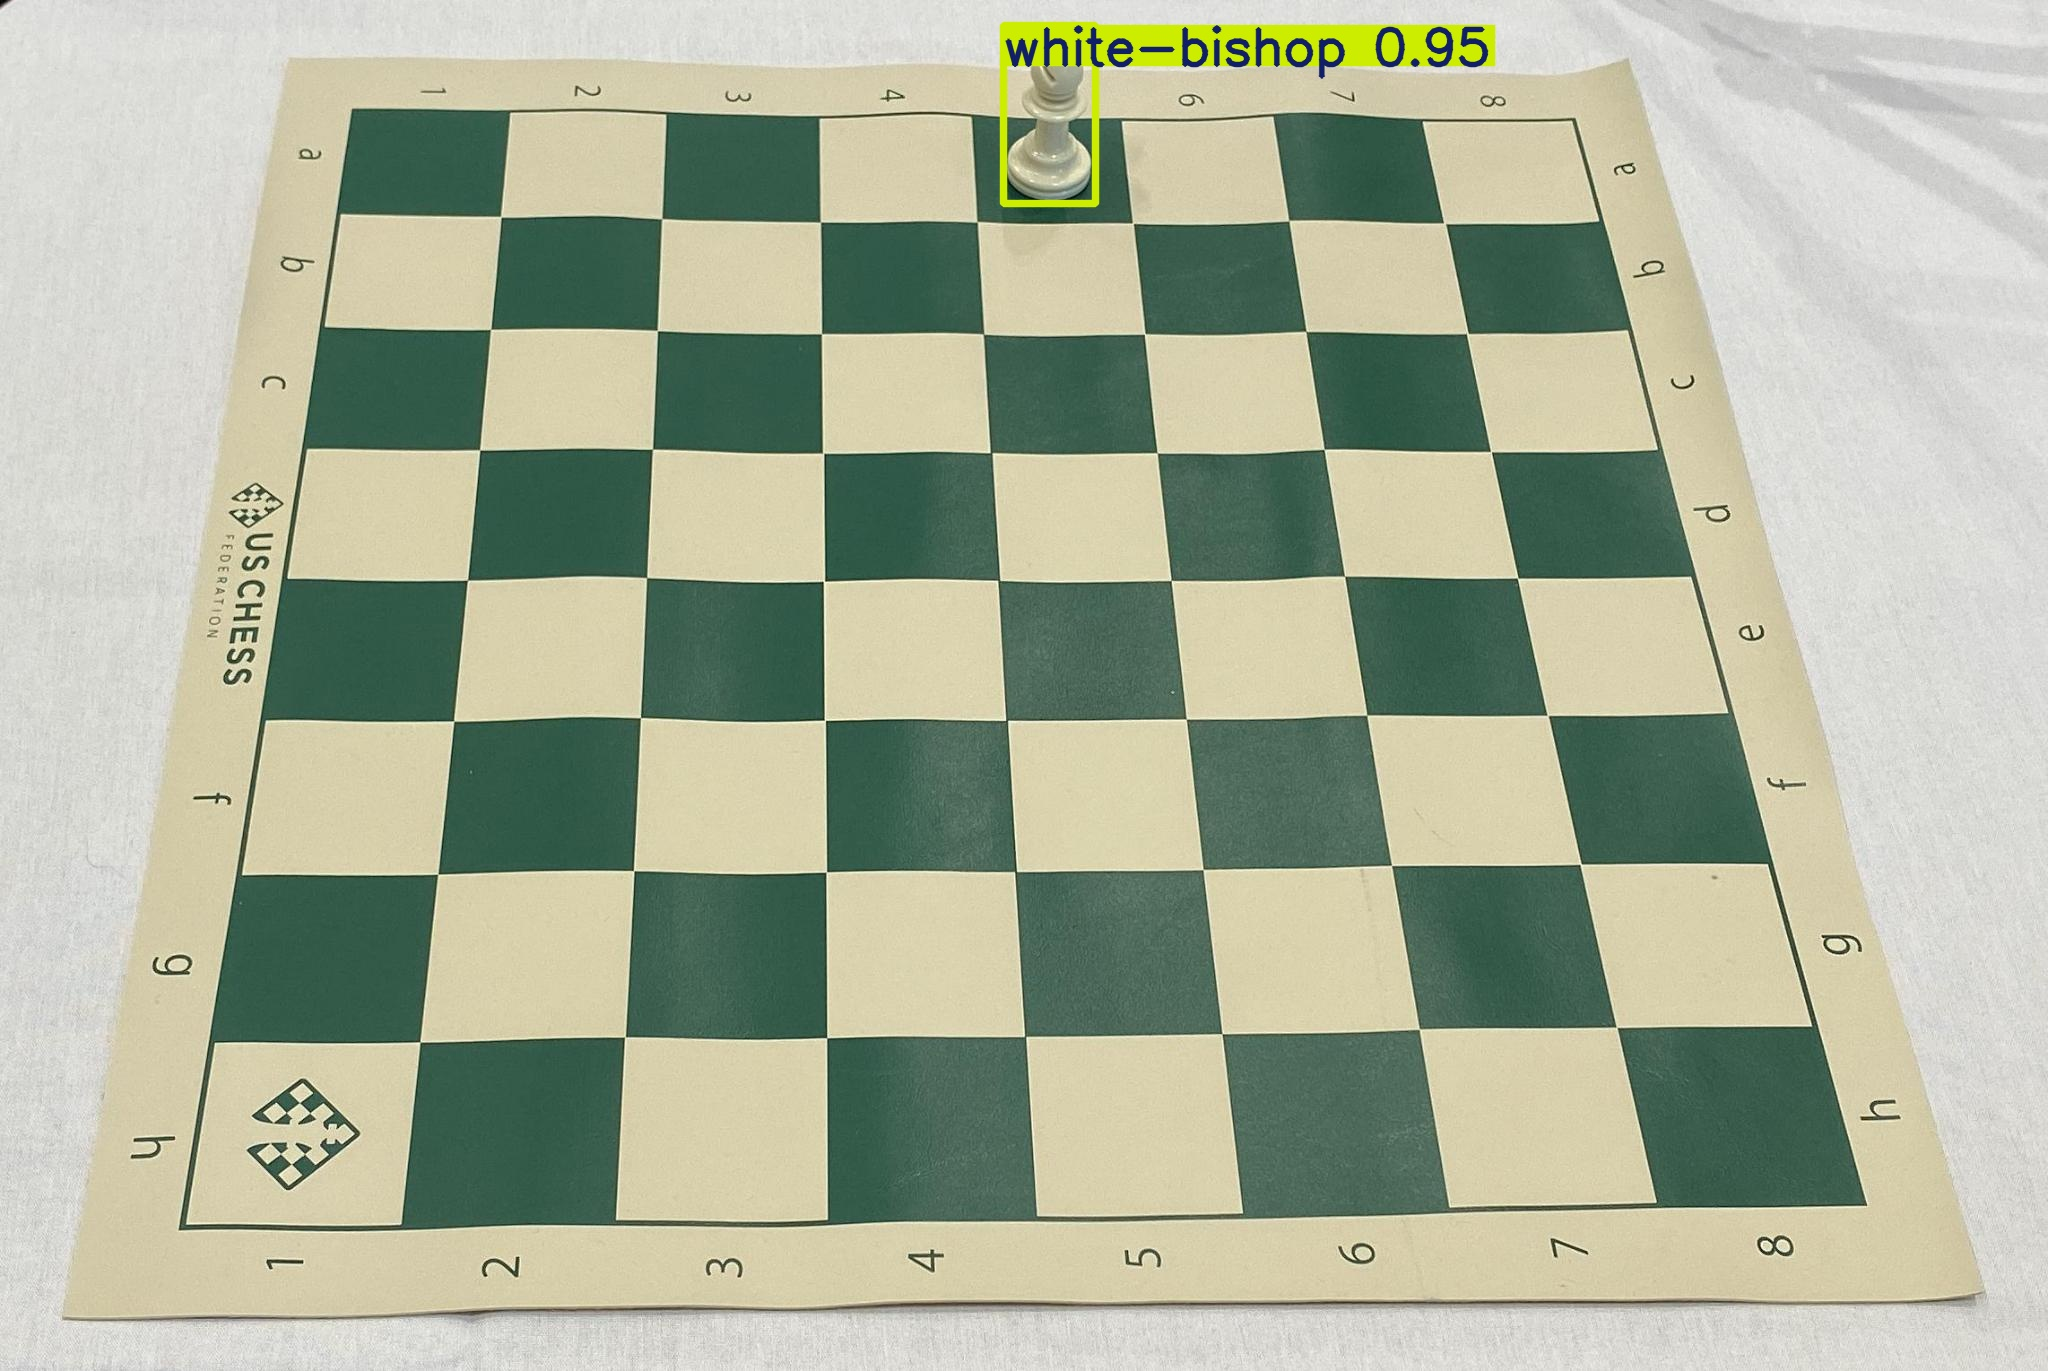

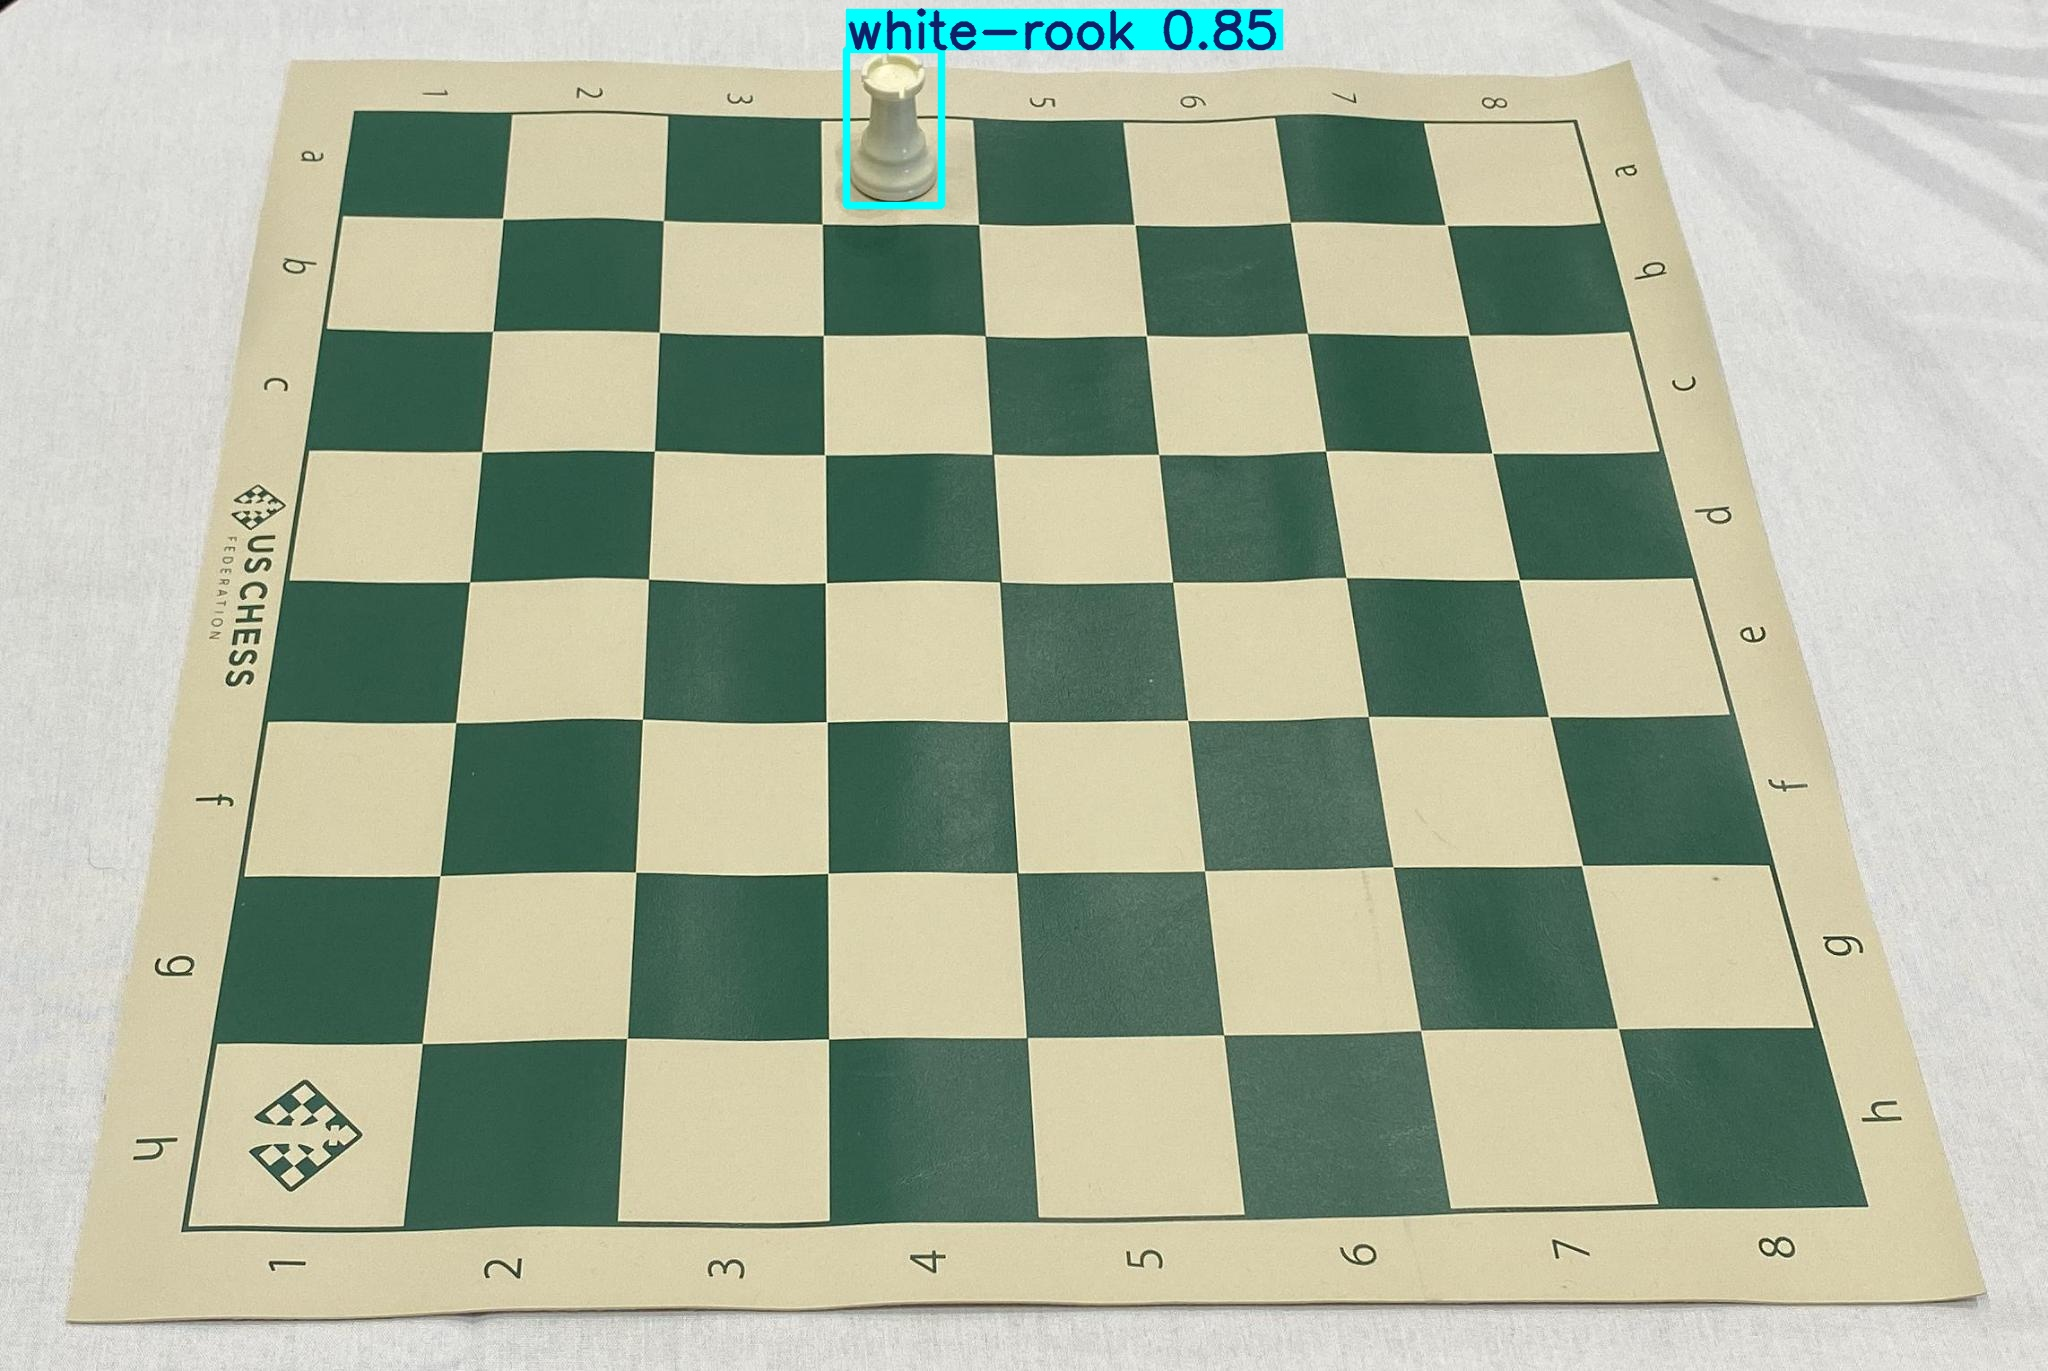

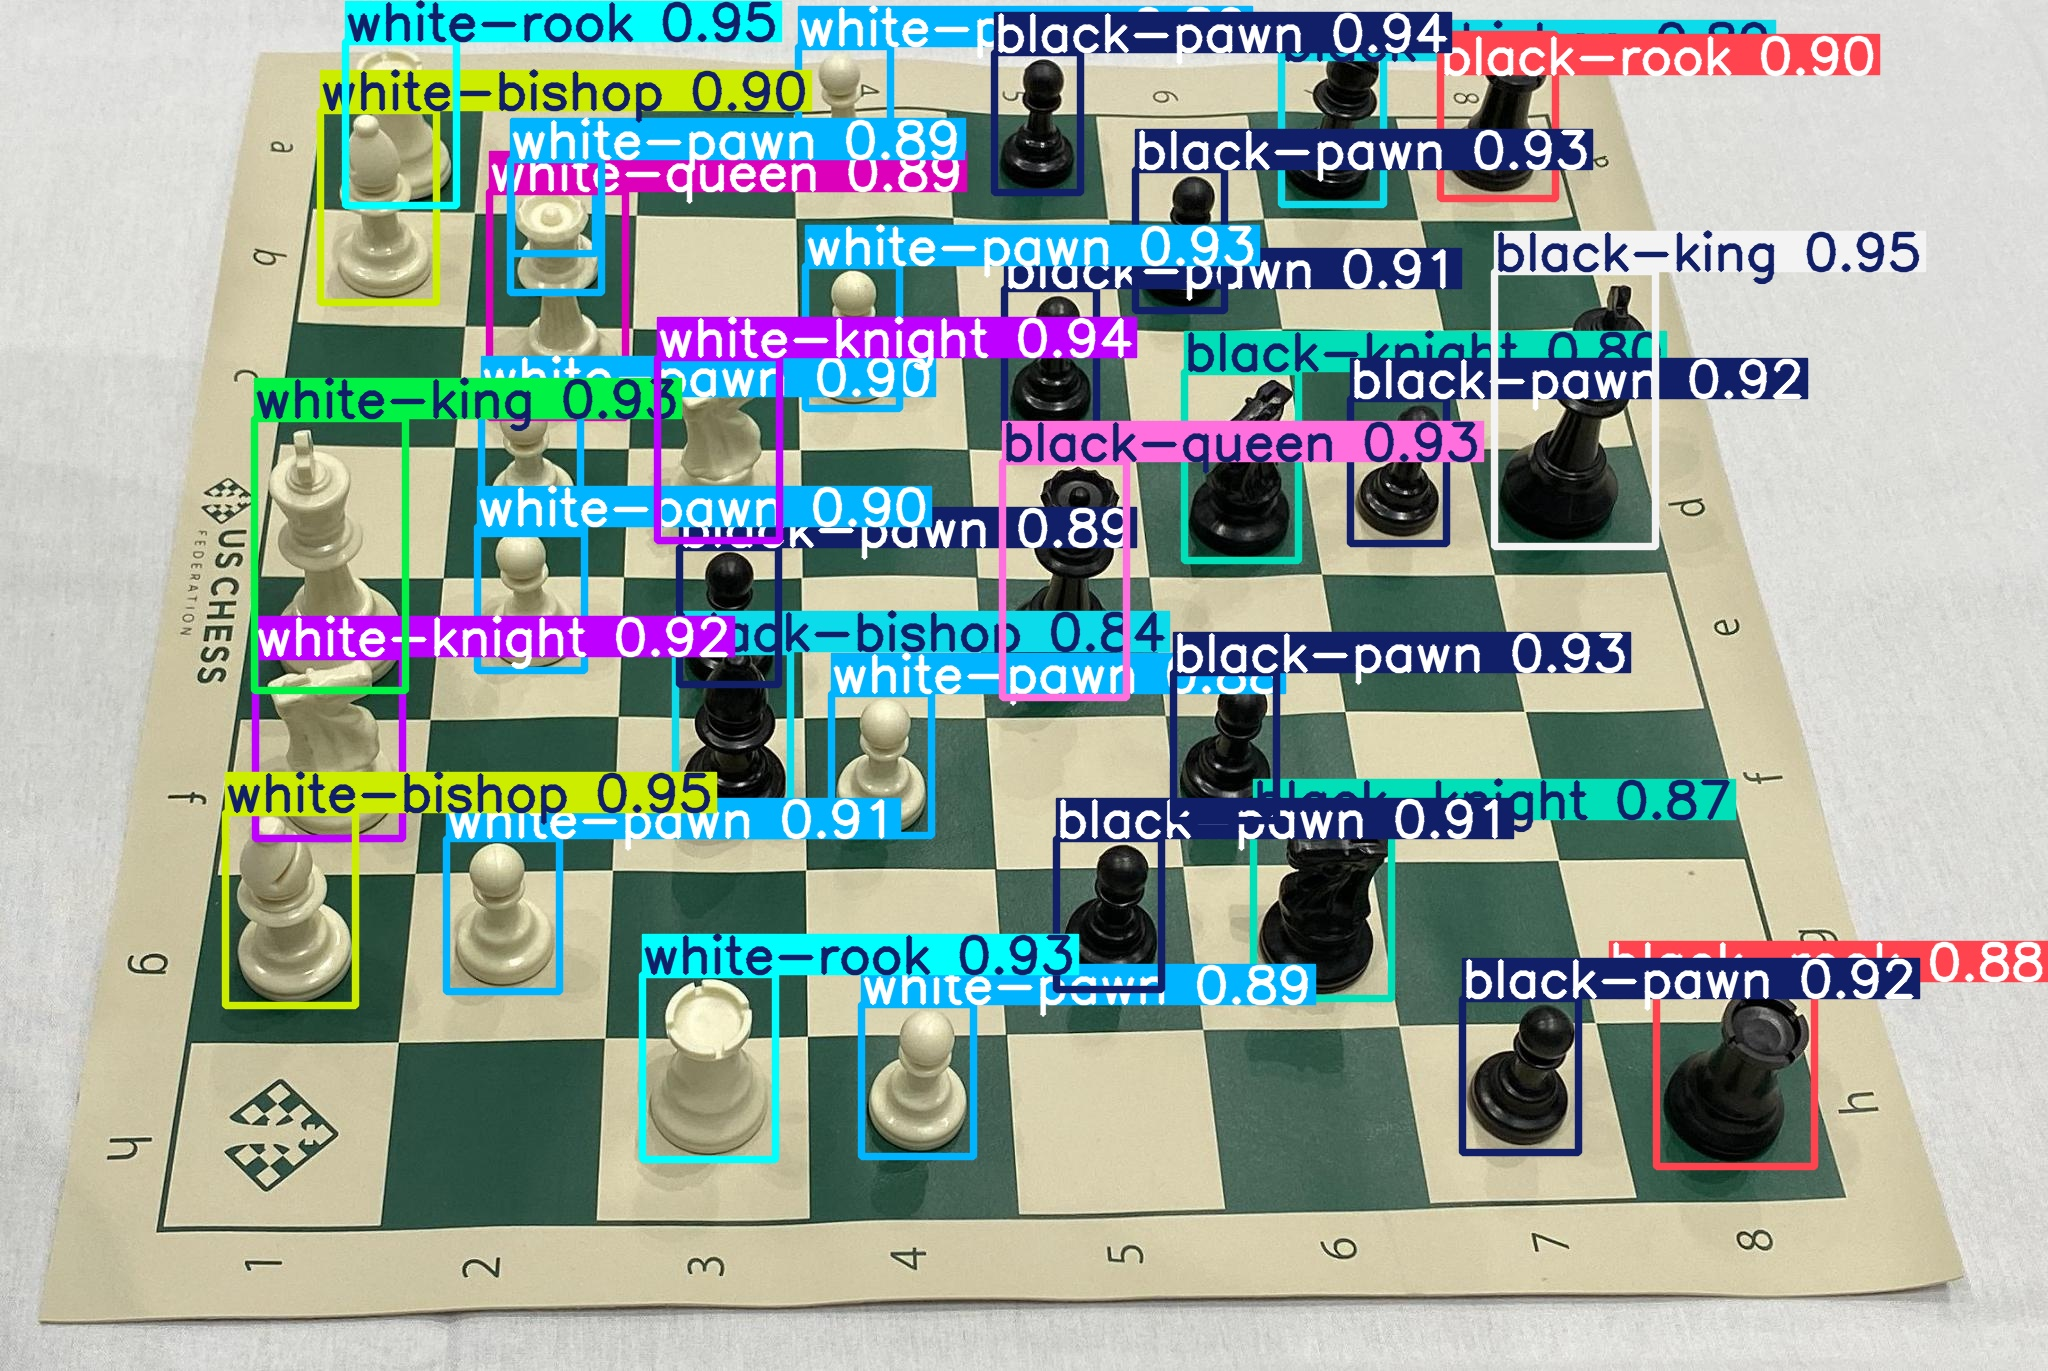

In [30]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = r'D:\03PersonalFiles\subjects\computer vision\Machine_Problem_1\CSST106-4A\CSST106-Perception-and-Computer-Vision\code\runs\detect'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")